In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

path = 'C:/SandBox/Prosperity/first-round/data/prices_round_1_day_-1.csv'

In [3]:
df = pd.read_csv(path, sep=';')
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-1,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
1,-1,0,STARFRUIT,5045,1,5040.0,31.0,NaN,NaN,5047,31,NaN,NaN,NaN,NaN,5046.0,0.0
2,-1,100,STARFRUIT,5040,24,NaN,NaN,NaN,NaN,5046,2,5047.0,22.0,NaN,NaN,5043.0,0.0
3,-1,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,0.0
4,-1,200,AMETHYSTS,9995,20,NaN,NaN,NaN,NaN,10005,20,NaN,NaN,NaN,NaN,10000.0,0.0


In [4]:
amethyst_df = df[df['product'] == 'AMETHYSTS']
starfruit_df = df[df['product'] == 'STARFRUIT']

In [5]:
# Create a new column for the emwa
amethyst_df['ewma'] = amethyst_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()
starfruit_df['ewma2'] = starfruit_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()
starfruit_df['ewma05'] = starfruit_df['mid_price'].ewm(alpha=0.08, adjust=False).mean()


C:\Users\daksh\AppData\Local\Temp\ipykernel_31944\3615133488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amethyst_df['ewma'] = amethyst_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()
C:\Users\daksh\AppData\Local\Temp\ipykernel_31944\3615133488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['ewma2'] = starfruit_df['mid_price'].ewm(alpha=0.1, adjust=False).mean()
C:\Users\daksh\AppData\Local\Temp\ipykernel_31944\3615133488.py:4: SettingWithCopyWarning: 
A value is trying to be s

(0.0, 1049895.0)

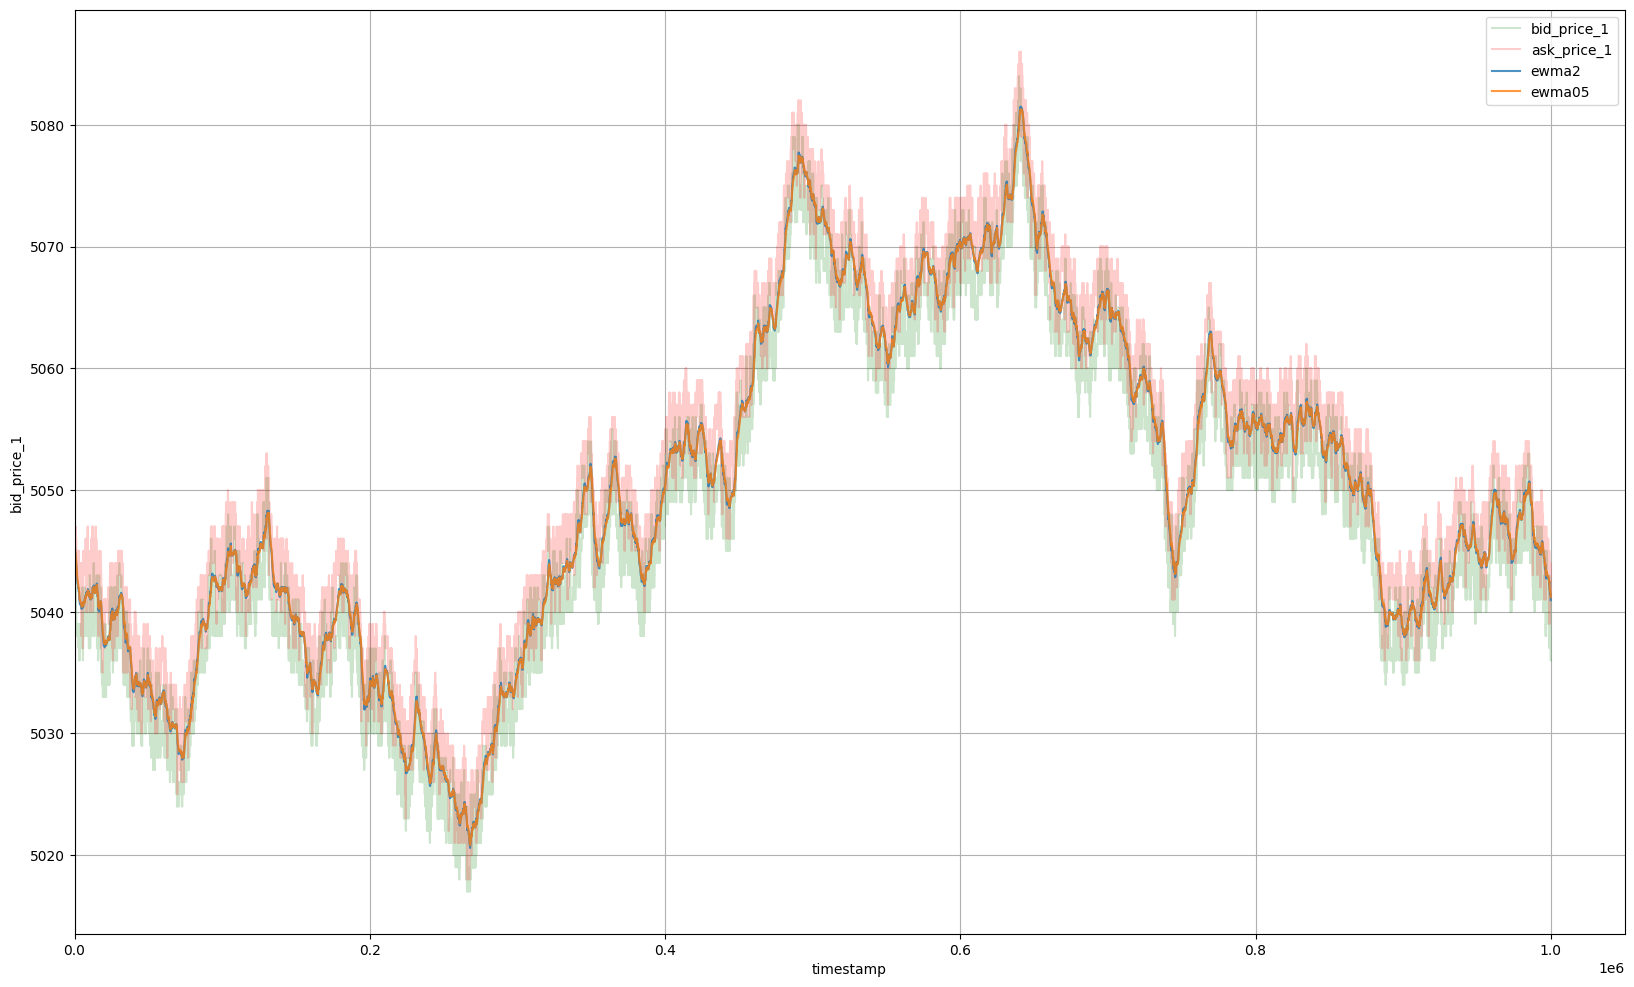

In [6]:
plt.figure(figsize=(20, 12))
plt.grid(True)
sns.lineplot(data=starfruit_df, x="timestamp", y="bid_price_1", errorbar=None, label="bid_price_1", alpha=0.2, color="green")
sns.lineplot(data=starfruit_df, x="timestamp", y="ask_price_1", errorbar=None, label="ask_price_1", alpha=0.2, color="red")
# sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price", alpha=0.3)
sns.lineplot(data=starfruit_df, x="timestamp", y="ewma2", errorbar=None, label="ewma2", alpha=0.8)
sns.lineplot(data=starfruit_df, x="timestamp", y="ewma05", errorbar=None, label="ewma05", alpha=0.8)
plt.xlim(0)
# plt.ylim(4940, 5020)

In [7]:
starfruit_df['BUYSIGNAL'] = starfruit_df['ewma2'] > starfruit_df['ewma05'] + 0.1

starfruit_df['SELLSIGNAL'] = starfruit_df['ewma2'] < starfruit_df['ewma05'] - 0.1

C:\Users\daksh\AppData\Local\Temp\ipykernel_31944\1871417558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['BUYSIGNAL'] = starfruit_df['ewma2'] > starfruit_df['ewma05'] + 0.1
C:\Users\daksh\AppData\Local\Temp\ipykernel_31944\1871417558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  starfruit_df['SELLSIGNAL'] = starfruit_df['ewma2'] < starfruit_df['ewma05'] - 0.1


<Axes: xlabel='timestamp', ylabel='bid_price_1'>

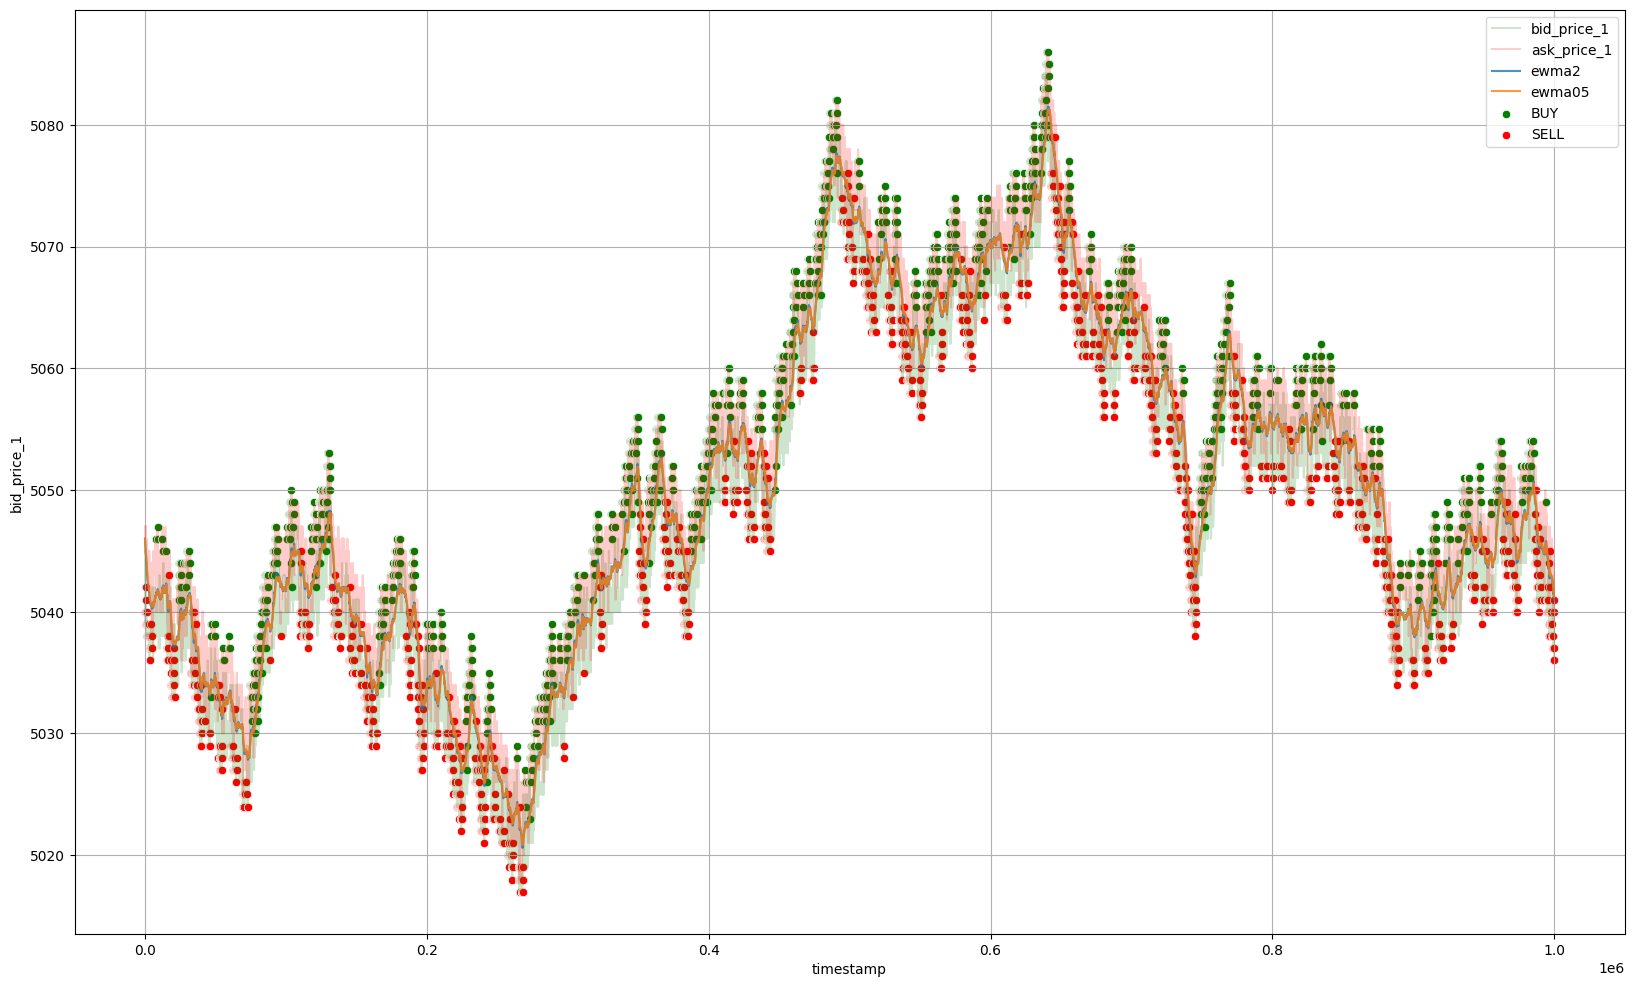

In [8]:
plt.figure(figsize=(20, 12))
plt.grid(True)
sns.lineplot(data=starfruit_df, x="timestamp", y="bid_price_1", errorbar=None, label="bid_price_1", alpha=0.2, color="green")
sns.lineplot(data=starfruit_df, x="timestamp", y="ask_price_1", errorbar=None, label="ask_price_1", alpha=0.2, color="red")
# sns.lineplot(data=starfruit_df, x="timestamp", y="mid_price", errorbar=None, label="mid_price", alpha=0.3)
sns.lineplot(data=starfruit_df, x="timestamp", y="ewma2", errorbar=None, label="ewma2", alpha=0.8)
sns.lineplot(data=starfruit_df, x="timestamp", y="ewma05", errorbar=None, label="ewma05", alpha=0.8)
sns.scatterplot(data=starfruit_df[starfruit_df['BUYSIGNAL']], x="timestamp", y="ask_price_1", color="green", label="BUY")
sns.scatterplot(data=starfruit_df[starfruit_df['SELLSIGNAL']], x="timestamp", y="bid_price_1", color="red", label="SELL")

In [9]:
pnl = 0
position = 0
trades = 0

# Buy signals
for index, row in starfruit_df[starfruit_df['BUYSIGNAL']].iterrows():
    buy_price = row['ask_price_1']
    sell_price = row['bid_price_1']
    pnl -= buy_price
    position += 1
    trades += 1
    
# Sell signals
for index, row in starfruit_df[starfruit_df['SELLSIGNAL']].iterrows():
    sell_price = row['bid_price_1']
    buy_price = row['ask_price_1']
    pnl += sell_price
    position -= 1
    trades += 1

print("Unrealised PNL:", pnl)
print("Final Position:", position)
print("Trades:", trades)
print("Final Cash:", pnl + position * starfruit_df['mid_price'].iloc[-1])


Unrealised PNL: 318617
Final Position: -68
Trades: 5560
Final Cash: -24001.0


In [10]:
data = pd.DataFrame()
ewmas = [int(i) for i in '01, 02, 03, 04, 05, 06, 07, 08, 09, 10, 20, 30, 40, 50, 60, 70, 80, 90'.split(',')]

for i in ewmas:
    data[str(i)] = starfruit_df['mid_price'].ewm(alpha=float(i/100), adjust=False).mean()

data['mid_price'] = starfruit_df['mid_price']
data['future_price'] = starfruit_df['mid_price'].shift(-1)

data = data.dropna()


In [11]:

def func(x, m, c):
    return m * x + c

r2 = 0
y_true = data['future_price'] - data['mid_price']
for i in range(len(ewmas)):
    for j in range(len(ewmas)):
        if i == j:
            continue
        popt, pcov = curve_fit(func, data[str(ewmas[j])] - data[str(ewmas[i])], data['future_price'] - data['mid_price'])       
        y_pred = func(data[str(ewmas[j])] - data[str(ewmas[i])], *popt)
        mse = mean_squared_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        if r2 >0.33:
            print(ewmas[i], ewmas[j],  popt[0], popt[1], np.sqrt(mse), r2)
# popt, pcov = curve_fit()
# print(popt)

30 90 -1.1745229586662198 -0.002176864792373445 1.3866687187371969 0.3326362686450425
40 80 -1.7516514458563819 -0.0019598949931944887 1.3886066029849238 0.3307696694684079
40 90 -1.4106525022759944 -0.0018446032592436268 1.3862398088587227 0.33304904874865926
80 40 1.751651444426588 -0.001959901582720195 1.3886066029849238 0.3307696694684079
90 30 1.174522958939524 -0.002176864697482239 1.3866687187371969 0.3326362686450425
90 40 1.4106525034093687 -0.0018446037041979224 1.3862398088587227 0.33304904874865926


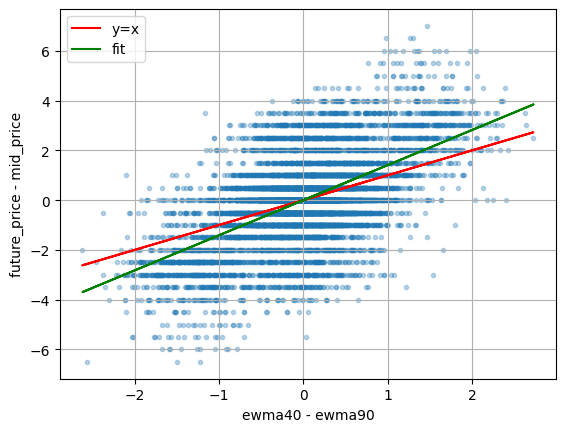

In [12]:
plt.grid(True)
plt.plot(data['40'] - data['90'], func(data['40'] - data['90'], 1, 0), color='red', label='y=x')
plt.plot(data['40'] - data['90'], func(data['40'] - data['90'], 1.4106525022759944, -0.0018446032592436268), color='green', label='fit')
plt.scatter(data['40'] - data['90'], y_true, alpha=0.3, marker = '.')
plt.xlabel('ewma40 - ewma90')
plt.ylabel('future_price - mid_price')
plt.legend()

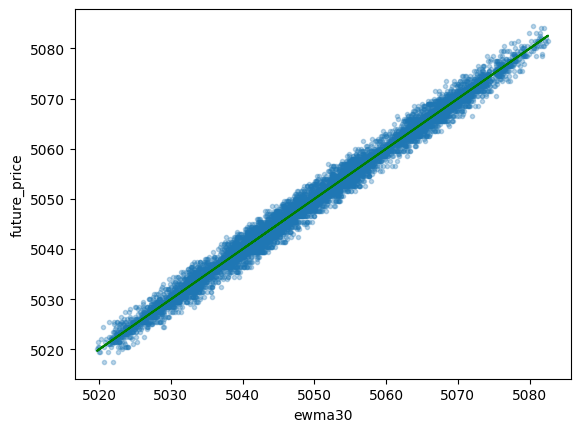

In [13]:
plt.scatter(data['30'], data['future_price'], marker = '.', alpha=0.3)
# plt.scatter(data['10'], data['future_price'], marker = '.', alpha=0.3)
plt.plot(data['30'], data['30'], color='green', label='y=x')
plt.xlabel('ewma30')
plt.ylabel('future_price')
plt.show()